In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
import sys
from sklearn import metrics
from keras.models import load_model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc as skAUC
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, TensorBoard
import tensorflow as tf
from keras import backend as K
import time
import glob
from tqdm import tqdm
import os

In [2]:
import pathlib
from keras import backend as K 
tf.config.experimental.list_physical_devices('GPU')
path = pathlib.Path.cwd()
path

PosixPath('/local_disk/james/Taylor_data/Train/Backup_models')

In [3]:
rinv = "0p3"
file_path = "LL-"+rinv+".h5"
hdf_file = path.parent/file_path
hf = h5py.File(hdf_file, "r")

In [4]:
X = hf["features"][:]
Y = hf["targets"][:]

In [5]:
N = len(X)
Ntrain, Nval, Ntest = int(N/5*4),  int(N/10),  int(N/10)
Xim_train, Xim_val, Xim_test = X[:Ntrain], X[Ntrain:Nval+Ntrain], X[Nval+Ntrain:N]
yim_train, yim_val, yim_test = Y[:Ntrain], Y[Ntrain:Nval+Ntrain], Y[Nval+Ntrain:N]

In [6]:
modelCNN_basis = tf.keras.models.load_model("./CNN_all_"+rinv+"_Adam_filter")

In [7]:
modelCNN_basis.summary()

Model: "CNN_basis"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32)]          0         
_________________________________________________________________
tf_op_layer_ExpandDims (Tens (None, 32, 32, 1)         0         
_________________________________________________________________
get_filter (get_filter)      (None, 32, 32, 1)         1024      
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 200)       3400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 200)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 248)         49848     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 192)         19

In [8]:
modelCNN_basis.evaluate(Xim_test, yim_test, batch_size=512)

372/372 [==============================] - 4s 10ms/step - loss: 0.1789 - accuracy: 0.9346


[0.17887775599956512, 0.9345947504043579]

In [10]:
from sklearn.metrics import roc_curve, auc

The area under the curves are:
AUC:0.017498913
AUC:0.982501087


<function matplotlib.pyplot.show(*args, **kw)>

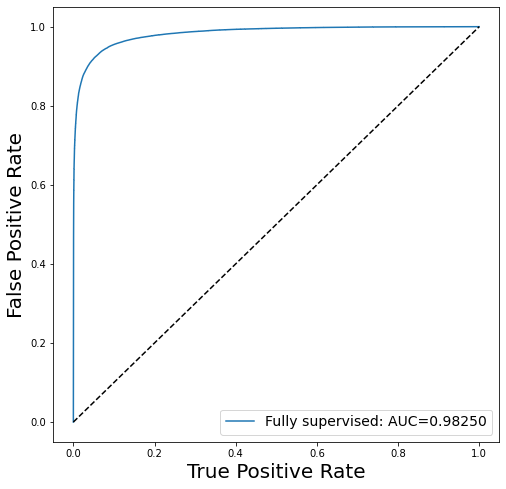

In [11]:
y_score=modelCNN_basis.predict(Xim_test)[:,0]
# test=[i[1] for i in yim_test]
fpr , tpr , thresholds = roc_curve ( yim_test , y_score)
roc_auc = auc(tpr,fpr )
print("The area under the curves are:")
print("AUC:{0:.9f}".format(roc_auc))
if roc_auc<0.5:
    a = tpr
    tpr = fpr
    fpr = a
    roc_auc = 1 - roc_auc
    print("AUC:{0:.9f}".format(roc_auc))
    
# FalsePositiveFull, TruePositiveFull, ThresholdFull = metrics.roc_curve(y_test,Predictions)
plt.figure(figsize=(8,8))

plt.plot(tpr,fpr, label='Fully supervised: AUC={0:.5f}'.format(roc_auc))
plt.ylabel('False Positive Rate',fontsize=20)
plt.xlabel('True Positive Rate',fontsize=20)
plt.plot([0, 1], [0, 1], 'k--')
# plt.legend()
# plt.legend(bbox_to_anchor=(0.8, -0.17),ncol=2)

plt.legend(prop={'size': 14})
plt.show